# DIABETES PREDICTOR TOOL PROJECT

#### By Mona Doane, BMath, BSCS

# A. METHODOLOGY FOR DEVELOPING THE DIABETES PREDICTOR TOOL

The following steps comprise the methodology used for developing the diabetes predictor tool: 
*  **Step 1:**  Import all relevant libraries to be used for data analysis
*  **Step 2:**  Get the data and set up the data for preliminary analysis 
*  **Step 3:**  Clean the data set
*  **Step 4:**  Visualize the data set
*  **Step 5:**  Reduce and balance the data set
*  **Step 6:**  Create testing and training data sets
*  **Step 7:**  Select, train and evaluate models
*  **Step 8:**  Select the most precise model and finetune it

## STEP 1:  IMPORT ALL RELEVANT LIBRARIES TO BE USED FOR DATA ANALYSIS

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Plots will appear inline in notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

# Model Evaluations
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

# Standardize any random options for duplication
seed = 42
np.random.seed(seed)

## STEP 2: GET THE DATA AND SET UP THE DATA FOR PRELIMINARY ANALYSIS

The following steps are used to get the data and set up the dataset for preliminary analysis:

* **2a.**  Import the data
* **2b.**  Inspect the data
* **2c.**  Reduce the number of factors to study to a reasonable number

### 2a. Import the data

**DATA SOURCE**

The original data came from the US Center for Disease Control and Prevention (CDC) and was conducted by the Behavioral Risk Factor Surveillance System (BRFSS) in 2021. According to the CDC, BRFSS conducts over 400,000 adult health-related telephone surveys with U.S. residents in all 50 states and DC and the US territories regarding their health-related risk behaviors, chronic health conditions, and use of preventive services.  

The original data can be found here.  
> https://www.cdc.gov/brfss/annual_data/annual_2021.html

The version of the data used in this project is also available on Kaggle.  The version used in this notebook is found here.    
> https://www.kaggle.com/datasets/dariushbahrami/cdc-brfss-survey-2021

A description of the features is contained in the following Codebook.  The Codebook contains the complete list of data variable names and methodology used to obtain and classify the data.  
> https://www.cdc.gov/brfss/annual_data/2021/pdf/codebook21_llcp-v2-508.pdf

In [2]:
# Load the dataset
CDC_Diabetes_DataSet = pd.read_csv('Diabetes_Dataset_2021.csv')

### 2b. Inspect the data

In [3]:
# View the number of rows and columns in dataset
CDC_Diabetes_DataSet.shape

(438693, 303)

**COMMENTS**  

> There are 438,693 rows and 303 columns.  I will need to reduce the number of rows and identify key features (or columns) to train the machine model without losing accuracy.

In [4]:
# View the dataset to gain a basic understanding of the data
CDC_Diabetes_DataSet.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1
0,1,1,1192021,1,19,2021,1100,2021000001,2021000001,1.0,...,1,1,100.0,214.0,1,1,1,1,0,0
1,1,1,1212021,1,21,2021,1100,2021000002,2021000002,1.0,...,1,1,100.0,128.0,1,1,1,1,0,0
2,1,1,1212021,1,21,2021,1100,2021000003,2021000003,1.0,...,1,1,100.0,71.0,1,2,1,1,0,0
3,1,1,1172021,1,17,2021,1100,2021000004,2021000004,1.0,...,1,1,114.0,165.0,1,1,1,1,0,0
4,1,1,1152021,1,15,2021,1100,2021000005,2021000005,1.0,...,1,1,100.0,258.0,1,1,1,1,0,0


In [5]:
# Attempt to get some information on the data
CDC_Diabetes_DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438693 entries, 0 to 438692
Columns: 303 entries, _STATE to _VEGETE1
dtypes: float64(245), int64(58)
memory usage: 1014.1 MB


In [6]:
# Attempt to get some information on the data
CDC_Diabetes_DataSet.describe()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1
count,438693.000000,438693.000000,4.386930e+05,438693.000000,438693.000000,438693.000000,438693.000000,4.386930e+05,4.386930e+05,117786.000000,...,438693.000000,438693.000000,387606.000000,378566.000000,438693.000000,438693.000000,438693.000000,438693.000000,438693.000000,438693.000000
mean,30.742155,6.405680,6.688758e+06,6.535354,15.138261,2021.053586,1118.189030,2.021006e+09,2.021006e+09,1.000017,...,0.883547,0.862941,178.342954,271.544175,2.270561,2.257184,0.994967,0.992699,0.126519,0.151662
std,15.334888,3.421731,3.444137e+06,3.443480,8.614820,0.225200,38.575453,6.383751e+03,6.383751e+03,0.004121,...,0.320767,0.343910,691.293103,1036.227213,2.485479,2.711460,0.070766,0.085135,0.347244,0.378501
min,1.000000,1.000000,1.012022e+06,1.000000,1.000000,2021.000000,1100.000000,2.021000e+09,2.021000e+09,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,3.000000,3.302021e+06,3.000000,8.000000,2021.000000,1100.000000,2.021002e+09,2.021002e+09,1.000000,...,1.000000,1.000000,57.000000,114.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,31.000000,6.000000,7.032021e+06,7.000000,15.000000,2021.000000,1100.000000,2.021004e+09,2.021004e+09,1.000000,...,1.000000,1.000000,100.000000,167.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,41.000000,9.000000,1.003202e+07,10.000000,22.000000,2021.000000,1100.000000,2.021008e+09,2.021008e+09,1.000000,...,1.000000,1.000000,200.000000,229.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000
max,78.000000,12.000000,1.231202e+07,12.000000,31.000000,2022.000000,1200.000000,2.021039e+09,2.021039e+09,2.000000,...,1.000000,1.000000,19800.000000,39600.000000,9.000000,9.000000,1.000000,1.000000,2.000000,2.000000


### 2c.  Reduce the number of factors to study to a reasonable number 

A review of the data above shows the data description and information above are not very helpful as there are too many data points.
Rather than studying 303 possible factors, I used established diabetes risk factors to narrow the columns into a smaller number of possible factors.  
> https://www.cdc.gov/diabetes/basics/risk-factors.html

**DIABETES AND ITS POSSIBLE RISK FACTORS**
1. Diabetes = DIABETE4
2. High Blood Pressure = _RFHYPE6
3. High Cholesterol = TOLDHI3
4. BMI = _BMI5
5.  Smoke = SMOKE100
6.  Stroke = CVDSTRK3
7.  Heart Issue = _MICHD
8.  Physical Activity = _TOTINDA
9.  Fruit = _FRTLT1A
10.  Vegetable = _VEGLT1A
11.  Alcohol = DRNKANY5
12.  Sex = _SEX
13.  Age = _AGEG5YR
14.  Race = _PRACE1


In [7]:
# Narrow 303 columns to 16 columns that are the most interesting for study
CDC_Diabetes_DataFrame_Selection = CDC_Diabetes_DataSet[['DIABETE4', '_RFHYPE6', 'TOLDHI3', '_BMI5', 'SMOKE100', 'CVDSTRK3', 
                                                          '_MICHD', '_TOTINDA', '_FRTLT1A', '_VEGLT1A', 'DRNKANY5', '_SEX',
                                                          '_AGEG5YR',  '_PRACE1']]

In [8]:
# View the number of rows and columns in the selected data frame 
CDC_Diabetes_DataFrame_Selection.shape

(438693, 14)

In [9]:
# View a sample of the selected data frame from the top
CDC_Diabetes_DataFrame_Selection.head()

,DIABETE4,_RFHYPE6,TOLDHI3,_BMI5,SMOKE100,CVDSTRK3,_MICHD,_TOTINDA,_FRTLT1A,_VEGLT1A,DRNKANY5,_SEX,_AGEG5YR,_PRACE1
0,3.0,1,1.0,1454.0,1.0,2.0,2.0,2,1,1,2,2,11,1.0
1,1.0,2,1.0,NaN,2.0,2.0,1.0,1,1,1,2,2,10,2.0
2,1.0,2,2.0,2829.0,2.0,2.0,1.0,2,1,2,2,2,11,2.0
3,1.0,2,1.0,3347.0,2.0,2.0,2.0,1,1,1,1,2,9,1.0
4,1.0,1,1.0,2873.0,2.0,1.0,1.0,1,1,1,2,1,12,1.0


In [10]:
# View a sample of the selected data frame from the bottom
CDC_Diabetes_DataFrame_Selection.tail()

,DIABETE4,_RFHYPE6,TOLDHI3,_BMI5,SMOKE100,CVDSTRK3,_MICHD,_TOTINDA,_FRTLT1A,_VEGLT1A,DRNKANY5,_SEX,_AGEG5YR,_PRACE1
438688,2.0,2,2.0,2469.0,1.0,2.0,2.0,1,1,1,1,2,3,99.0
438689,1.0,2,2.0,NaN,2.0,2.0,2.0,2,1,1,2,1,13,6.0
438690,3.0,1,1.0,3068.0,2.0,2.0,2.0,1,1,1,1,1,7,2.0
438691,3.0,2,2.0,2373.0,2.0,2.0,2.0,1,1,1,1,1,10,99.0
438692,3.0,1,1.0,3171.0,2.0,2.0,2.0,1,2,2,1,2,6,2.0


## STEP 3:  CLEAN THE DATA SET

The next step is to clean the data set to facilitate machine learning. This involves the following: 

* **3a.** Rename columns to make features more readable
* **3b.** Inspect the data for missing values and remove all data with missing values
* **3c.** Modify and clean the data to be more suitable to machine learning algorithms
* **3d.** Inspect results of the data cleaning process

### 3a:  Rename columns to make feature names from readable

In [11]:
#Rename the columns to make them more readable
CDC_Diabetes_DataFrame_Selection = CDC_Diabetes_DataFrame_Selection.rename(columns = {
    'DIABETE4':'Diabetes', '_RFHYPE6':'HighBloodPressure', 'TOLDHI3':'HighCholesterol', 
    '_BMI5':'BMI', '_BMI5CAT':'Overweight', 'SMOKE100':'Smoker', 'CVDSTRK3':'Stroke', '_MICHD':'HeartIssues', 
    '_TOTINDA':'PhysicalActivity','_FRTLT1A':'Fruits', '_VEGLT1A':"Vegetables", 'DRNKANY5':'Alcohol', 
    '_SEX':'Sex', '_AGEG5YR':'Age', '_PRACE1':'Race'})

In [12]:
# View a sample of the selected data frame with the modified column names
CDC_Diabetes_DataFrame_Selection.head()

,Diabetes,HighBloodPressure,HighCholesterol,BMI,Smoker,Stroke,HeartIssues,PhysicalActivity,Fruits,Vegetables,Alcohol,Sex,Age,Race
0,3.0,1,1.0,1454.0,1.0,2.0,2.0,2,1,1,2,2,11,1.0
1,1.0,2,1.0,NaN,2.0,2.0,1.0,1,1,1,2,2,10,2.0
2,1.0,2,2.0,2829.0,2.0,2.0,1.0,2,1,2,2,2,11,2.0
3,1.0,2,1.0,3347.0,2.0,2.0,2.0,1,1,1,1,2,9,1.0
4,1.0,1,1.0,2873.0,2.0,1.0,1.0,1,1,1,2,1,12,1.0


### 3b:  Inspect the data for missing values and remove all data with missing values

In [13]:
# Review to see if there are any missing values (i.e. Na)
CDC_Diabetes_DataFrame_Selection.isna().sum()

Diabetes                 3
HighBloodPressure        0
HighCholesterol      60836
BMI                  46852
Smoker               21232
Stroke                   2
HeartIssues           4635
PhysicalActivity         0
Fruits                   0
Vegetables               0
Alcohol                  0
Sex                      0
Age                      0
Race                     4
dtype: int64

In [14]:
# Drop all missing data points
CDC_Diabetes_DataFrame_Selection = CDC_Diabetes_DataFrame_Selection.dropna()

In [15]:
# Review to ensure rows with missing values (i.e. NaN) are dropped 
CDC_Diabetes_DataFrame_Selection.isna().sum()

Diabetes             0
HighBloodPressure    0
HighCholesterol      0
BMI                  0
Smoker               0
Stroke               0
HeartIssues          0
PhysicalActivity     0
Fruits               0
Vegetables           0
Alcohol              0
Sex                  0
Age                  0
Race                 0
dtype: int64

In [16]:
# Review to ensure rows with missing values (i.e. Null) are dropped 
CDC_Diabetes_DataFrame_Selection.isnull().sum()

Diabetes             0
HighBloodPressure    0
HighCholesterol      0
BMI                  0
Smoker               0
Stroke               0
HeartIssues          0
PhysicalActivity     0
Fruits               0
Vegetables           0
Alcohol              0
Sex                  0
Age                  0
Race                 0
dtype: int64

In [17]:
# View the number of rows and columns in the remaining selected data frame
CDC_Diabetes_DataFrame_Selection.shape

(330365, 14)

### 3c:  Modify and clean the data to be more suitable to machine learning algorithms

Each variable is described in the codebook with the variables and respondent values. In studying each remaining variable in the codebook, I notived the data set includes responses such as "don't know" or "refused" so our next step is to remove those responses.  If possible, where there are multiple valid responses, the data set is reduced to binary classifications that will allow for machine learning.  

Codebook Link:  
> https://www.cdc.gov/brfss/annual_data/2021/pdf/codebook21_llcp-v2-508.pdf

Clean Each Variable: 
1. Diabetes
2. High Blood Pressure
3. High Cholesterol
4. BMI
5. Smoker
6. Stroke
7. HeartIssues
8. PhysicalActivity
9. Fruits
10. Vegetables
11. Alcohol
12. Sex
13. Age
14. Race

##### 1. Variable:  Diabetes

In [18]:
# This is what the survey will predict using machine learning
# DIABETE4 = Diabetes = Have you ever been told you have diabetes?
# Respondent values: 1 = Yes; 2 = Yes when pregnant; 3 = No; 4 = No but has pre-diabetes; 7 = Don't know; 9 = Refused 
# Revised dataset as follows: 
    # Modified to binary classification: 
        # 0 = No Diabetes (includes 2 = Yes when pregnant; and 3 = No) 
        # 1 = Diabetes (includes 1 = Yes; and 4 = No but has pre-diabetes)
    # Removed: 7 = Don't know; and 9 = Refused 
CDC_Diabetes_DataFrame_Selection['Diabetes'] = CDC_Diabetes_DataFrame_Selection['Diabetes'].replace({1:1, 2:0, 3:0, 4:1})
CDC_Diabetes_DataFrame_Selection = CDC_Diabetes_DataFrame_Selection[CDC_Diabetes_DataFrame_Selection.Diabetes != 7]
CDC_Diabetes_DataFrame_Selection = CDC_Diabetes_DataFrame_Selection[CDC_Diabetes_DataFrame_Selection.Diabetes != 9]

#Display all unique values in Diabetes Column (should be only 0s and 1s)
CDC_Diabetes_DataFrame_Selection.Diabetes.unique()

array([0., 1.])

##### 2. Variable:  High Blood Pressure

In [19]:
# _RFHYPE6 = HighBloodPressure = Have you ever been told you have high blood pressure by a doctor, nurse or other health professional?
# Respondent values:  1 = No; 2 = Yes; 9 = All others (Don't know, Refused) 
# Revised dataset as follows: 
    # Modified to binary classification: 
        # 0 = No High Blood Pressure (1 = No)  
        # 1 = High Blood Pressure (2 = Yes)
    # Removed: 9 = All others (Don't know, Refused) 
CDC_Diabetes_DataFrame_Selection['HighBloodPressure'] = CDC_Diabetes_DataFrame_Selection['HighBloodPressure'].replace({1:0, 2:1})
CDC_Diabetes_DataFrame_Selection = CDC_Diabetes_DataFrame_Selection[CDC_Diabetes_DataFrame_Selection.HighBloodPressure != 9]

#Display all unique values in HighBloodPressure Column (should be only 0s and 1s)
CDC_Diabetes_DataFrame_Selection.HighBloodPressure.unique()

array([0, 1], dtype=int64)

##### 3. Variable:  High Cholesterol

In [20]:
# TOLDHI3 = HighCholesterol = Have you ever been told by a doctor, nurse or other health professional that your cholesterol is high? 
# Respondent values:  1 = Yes; 2 = No; 7 = Don't know; 9 = Refused 
# Revised dataset as follows: 
    # Modified to binary classification: 
        # 0 = No High Cholesterol (2 = No)  
        # 1 = High Cholesterol (1 = Yes)
    # Removed: 7 = Don't know; 9 = Refused 
CDC_Diabetes_DataFrame_Selection['HighCholesterol'] = CDC_Diabetes_DataFrame_Selection['HighCholesterol'].replace({1:1, 2:0})
CDC_Diabetes_DataFrame_Selection = CDC_Diabetes_DataFrame_Selection[CDC_Diabetes_DataFrame_Selection.HighCholesterol != 7]
CDC_Diabetes_DataFrame_Selection = CDC_Diabetes_DataFrame_Selection[CDC_Diabetes_DataFrame_Selection.HighCholesterol != 9]

#Display all unique values in HighCholesterol Column (should be only 0s and 1s)
CDC_Diabetes_DataFrame_Selection.HighCholesterol.unique()

array([1., 0.])

##### 4. Variable: BMI

In [21]:
# _BMI5 = Body mass index =  Note this is computed from height and weight 
# BMI are * 100
CDC_Diabetes_DataFrame_Selection['BMI'] = CDC_Diabetes_DataFrame_Selection['BMI'].div(100).round(0)
CDC_Diabetes_DataFrame_Selection.BMI.unique()

array([15., 28., 33., 29., 24., 46., 23., 40., 27., 35., 18., 30., 25.,
       36., 22., 31., 45., 26., 14., 38., 21., 32., 20., 19., 34., 41.,
       43., 44., 39., 37., 16., 42., 50., 51., 17., 52., 47., 49., 56.,
       57., 48., 58., 61., 53., 63., 64., 54., 68., 55., 62., 13., 59.,
       89., 66., 77., 60., 87., 69., 72., 75., 67., 71., 65., 82., 86.,
       70., 78., 12., 74., 98., 73., 84., 76., 80., 83., 79., 99., 88.,
       81., 90., 92., 91., 95., 85., 94.])

##### 5. Variable: Smoker

In [22]:
# SMOKE100  = Smoker = Have you smoked at least 100 cigarettes in your entire life? 
# Respondent values: 1 = Yes; 2 = No; 7 = Don't know; 9 = Refused 
# Revised dataset as follows: 
    # Modified to binary classification: 
        # 0 = Non-smoker (2 = No)  
        # 1 = Smoker (1 = Yes)
    # Removed: 7 = Don't know; 9 = Refused 
CDC_Diabetes_DataFrame_Selection['Smoker'] = CDC_Diabetes_DataFrame_Selection['Smoker'].replace({2:0, 1:1})
CDC_Diabetes_DataFrame_Selection = CDC_Diabetes_DataFrame_Selection[CDC_Diabetes_DataFrame_Selection.Smoker != 7]
CDC_Diabetes_DataFrame_Selection = CDC_Diabetes_DataFrame_Selection[CDC_Diabetes_DataFrame_Selection.Smoker != 9]

#Display all unique values in Smoker Column (should be only 0s and 1s)
CDC_Diabetes_DataFrame_Selection.Smoker.unique()

array([1., 0.])

##### 6. Variable: Stroke

In [23]:
# CVDSTRK3 = Stroke = Have you ever been told you had a stroke?
# Respondent values: 1 = Yes; 2 = No; 7 = Don't know; 9 = Refused 
# Revised dataset as follows: 
    # Modified to binary classification: 
        # 0 = No Stroke (2 = No)  
        # 1 = Stroke (1 = Yes)
    # Removed: 7 = Don't know; 9 = Refused 
CDC_Diabetes_DataFrame_Selection['Stroke'] = CDC_Diabetes_DataFrame_Selection['Stroke'].replace({2:0, 1:1})
CDC_Diabetes_DataFrame_Selection = CDC_Diabetes_DataFrame_Selection[CDC_Diabetes_DataFrame_Selection.Stroke != 7]
CDC_Diabetes_DataFrame_Selection = CDC_Diabetes_DataFrame_Selection[CDC_Diabetes_DataFrame_Selection.Stroke != 9]

#Display all unique values in Stroke Column (should be only 0s and 1s)
CDC_Diabetes_DataFrame_Selection.Stroke.unique()

array([0., 1.])

##### 7. Variable: Heart Issues

In [24]:
# _MICHD = HeartIssues = Have you ever been told you have coronary heart disease (CHD) or myocardial infarction (MI)?
# Respondent values: 1 = Yes; 2 = No; 7 = Don't know; 9 = Refused 
# Revised dataset as follows: 
    # Modified to binary classification: 
        # 0 = No Heart Issues (2 = No)  
        # 1 = Heart Issues (1 = Yes)
    # Removed: 7 = Don't know; 9 = Refused 
CDC_Diabetes_DataFrame_Selection['HeartIssues'] = CDC_Diabetes_DataFrame_Selection['HeartIssues'].replace({2:0, 1:1})
CDC_Diabetes_DataFrame_Selection = CDC_Diabetes_DataFrame_Selection[CDC_Diabetes_DataFrame_Selection.HeartIssues != 7]
CDC_Diabetes_DataFrame_Selection = CDC_Diabetes_DataFrame_Selection[CDC_Diabetes_DataFrame_Selection.HeartIssues != 9]

#Display all unique values in HeartIssues Column (should be only 0s and 1s)
CDC_Diabetes_DataFrame_Selection.HeartIssues.unique()

array([0., 1.])

##### 8. Variable: Physical Activity

In [25]:
# _TOTINDA = PhysicalActivity = Have you done any physical activity or exercised during the past 30 days other than for work?
# Respondent values: 1 = Yes; 2 = No; 9 = All Others (Don't Know, Refused) 
# Revised dataset as follows: 
    # Modified to binary classification: 
        # 0 = No Physical Activity (2 = No)  
        # 1 = Physical Activity (1 = Yes)
    # Removed: 9 = All Others (Don't Know, Refused) 
CDC_Diabetes_DataFrame_Selection['PhysicalActivity'] = CDC_Diabetes_DataFrame_Selection['PhysicalActivity'].replace({2:0, 1:1})
CDC_Diabetes_DataFrame_Selection = CDC_Diabetes_DataFrame_Selection[CDC_Diabetes_DataFrame_Selection.PhysicalActivity != 9]

#Display all unique values in Physical Activity Column (should be only 0s and 1s)
CDC_Diabetes_DataFrame_Selection.PhysicalActivity.unique()

array([0, 1], dtype=int64)

##### 9. Variable: Fruits

In [26]:
# _FRTLT1A = Fruits = Do you eat fruits 1 or more times a day? 
# Respondent values: 1 = Yes; 2 = No; 9 = All Others (Don't Know, Refused) 
# Revised dataset as follows: 
    # Modified to binary classification: 
        # 0 = Does Not Consume Fruits (2 = No)  
        # 1 = Consumes Fruits (1 = Yes)
    # Removed: 9 = All Others (Don't Know, Refused) 
CDC_Diabetes_DataFrame_Selection['Fruits'] = CDC_Diabetes_DataFrame_Selection['Fruits'].replace({2:0, 1:1})
CDC_Diabetes_DataFrame_Selection = CDC_Diabetes_DataFrame_Selection[CDC_Diabetes_DataFrame_Selection.Fruits != 9]

#Display all unique values in Fruits Column (should be only 0s and 1s)
CDC_Diabetes_DataFrame_Selection.Fruits.unique()

array([1, 0], dtype=int64)

##### 10. Variable: Vegetables

In [27]:
# _VEGLT1A = Vegetables = Do you eat vegetables 1 or more times a day? 
# Respondent values: 1 = Yes; 2 = No; 9 = All Others (Don't Know, Refused) 
# Revised dataset as follows: 
    # Modified to binary classification: 
        # 0 = Does Not Consume Vegetables (2 = No)  
        # 1 = Consumes Vegetables (1 = Yes)
    # Removed: 9 = All Others (Don't Know, Refused) 
CDC_Diabetes_DataFrame_Selection['Vegetables'] = CDC_Diabetes_DataFrame_Selection['Vegetables'].replace({2:0, 1:1})
CDC_Diabetes_DataFrame_Selection = CDC_Diabetes_DataFrame_Selection[CDC_Diabetes_DataFrame_Selection.Vegetables != 9]

#Display all unique values in Vegetables Column (should be only 0s and 1s)
CDC_Diabetes_DataFrame_Selection.Vegetables.unique()

array([1, 0], dtype=int64)

##### 11. Variable: Alcohol

In [28]:
# DRNKANY5 = Alcohol = Have you had alcohol in the past 30 days?  
# Respondent values: 1 = Yes; 2 = No; 7 = Don't know; 9 = Refused 
# Revised dataset as follows: 
    # Modified to binary classification: 
        # 0 = Does Not Consume Alcohol (2 = No)  
        # 1 = Consumes Alcohol (1 = Yes)
    # Removed: 7 = Don't know; 9 = Refused 
CDC_Diabetes_DataFrame_Selection['Alcohol'] = CDC_Diabetes_DataFrame_Selection['Alcohol'].replace({2:0, 1:1})
CDC_Diabetes_DataFrame_Selection = CDC_Diabetes_DataFrame_Selection[CDC_Diabetes_DataFrame_Selection.Alcohol != 7]
CDC_Diabetes_DataFrame_Selection = CDC_Diabetes_DataFrame_Selection[CDC_Diabetes_DataFrame_Selection.Alcohol != 9]

#Display all unique values in Alcohol Column (should be only 0s and 1s)
CDC_Diabetes_DataFrame_Selection.Alcohol.unique()

array([0, 1], dtype=int64)

##### 12. Variable: Sex

In [29]:
# _SEX = Sex = Are you male or female? 
# Respondent values: 1 = Male; 2 = Female
# Revised dataset as follows: 
    # Modified to binary classification: 
        # 0 = Female (2 = Female)  
        # 1 = Male (1 = Male)
CDC_Diabetes_DataFrame_Selection['Sex'] = CDC_Diabetes_DataFrame_Selection['Sex'].replace({2:0})

#Display all unique values in Sex Column (should be only 0s and 1s)
CDC_Diabetes_DataFrame_Selection.Sex.unique()

array([0, 1], dtype=int64)

##### 13. Variable: Age

In [30]:
# _AGEG5YR = Age = How old are you?  
# Respondent values: 1-13 = Age is reported in 5 year increments; 14 = Don't know, refused, missing
# Revised dataset as follows:
    # Removed: 14 = Don't know, refused, missing
CDC_Diabetes_DataFrame_Selection = CDC_Diabetes_DataFrame_Selection[CDC_Diabetes_DataFrame_Selection.Age != 14]

#Display all unique values in Age Column (should be only 1-13)
CDC_Diabetes_DataFrame_Selection.Age.unique()

array([11,  9, 12, 13, 10,  7,  6,  8,  1,  4,  3,  5,  2], dtype=int64)

##### 14. Variable: Race

In [31]:
# _PRACE1 = PreferredRace = What is your preferred Race category?
# Respondent values: 
# 1-5 = Single Race denomination; 6 = Other Race; 7 = No Preferred race; 8 = Multiracial but not answered; 77 = Don't know; 99 = Refused 
# Revised dataset as follows:
    # Modified to classifications as follows:
        # 0 = Race not used as a factor for the following:
            # 6 = Other Race; 7 = No Preferred race; 8 = Multiracial but not answered; 77 = Don't know; 99 = Refused
CDC_Diabetes_DataFrame_Selection['Race'] = CDC_Diabetes_DataFrame_Selection['Race'].replace({6:0, 7:0, 8:0, 77:0, 99:0})

#Display all unique values in RaceColumn (should be only 0-5)
CDC_Diabetes_DataFrame_Selection.Race.unique()

array([1., 2., 0., 3., 4., 5.])

### 3d. Inspect results of the data cleaning process

In [32]:
# Determine how many rows and columns are remaining
CDC_Diabetes_DataFrame_Selection.shape

(288270, 14)

In [33]:
# Check that the above resulted in a balanced set of data. The number of diabetes data points should equal the number of non-diabetes data points.  
CDC_Diabetes_DataFrame_Selection.groupby(['Diabetes']).size()

Diabetes
0.0    239889
1.0     48381
dtype: int64

In [34]:
# View the variable types of remaining columns
CDC_Diabetes_DataFrame_Selection.info()

<class 'pandas.core.frame.DataFrame'>
Index: 288270 entries, 0 to 438692
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Diabetes           288270 non-null  float64
 1   HighBloodPressure  288270 non-null  int64  
 2   HighCholesterol    288270 non-null  float64
 3   BMI                288270 non-null  float64
 4   Smoker             288270 non-null  float64
 5   Stroke             288270 non-null  float64
 6   HeartIssues        288270 non-null  float64
 7   PhysicalActivity   288270 non-null  int64  
 8   Fruits             288270 non-null  int64  
 9   Vegetables         288270 non-null  int64  
 10  Alcohol            288270 non-null  int64  
 11  Sex                288270 non-null  int64  
 12  Age                288270 non-null  int64  
 13  Race               288270 non-null  float64
dtypes: float64(7), int64(7)
memory usage: 33.0 MB


In [35]:
# Get the description of the data set remaining
CDC_Diabetes_DataFrame_Selection.describe()

,Diabetes,HighBloodPressure,HighCholesterol,BMI,Smoker,Stroke,HeartIssues,PhysicalActivity,Fruits,Vegetables,Alcohol,Sex,Age,Race
count,288270.000000,288270.000000,288270.000000,288270.000000,288270.000000,288270.000000,288270.000000,288270.000000,288270.000000,288270.000000,288270.000000,288270.000000,288270.000000,288270.000000
mean,0.167832,0.423867,0.404739,28.810906,0.410410,0.040889,0.089687,0.771704,0.623873,0.823971,0.535588,0.468859,7.995237,1.175547
std,0.373718,0.494171,0.490842,6.544503,0.491909,0.198033,0.285733,0.419735,0.484413,0.380846,0.498733,0.499030,3.300505,0.726959
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,6.000000,1.000000
50%,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,8.000000,1.000000
75%,0.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,1.000000
max,1.000000,1.000000,1.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,5.000000


## STEP 4: VISUALIZE THE DATA SET

The next step is to visualize the cleaned data set. We will do so as follows: 
* **4a.** Compare Diabetes frequency to Being Overweight using BMI over 25 or higher as overweight
* **4b.** View histograms of age of the complete dataset
* **4c.** View the correlation matrix 

### 4a. Compare Diabetes frequency to Being Overweight using BMI over 25 or higher as overweight

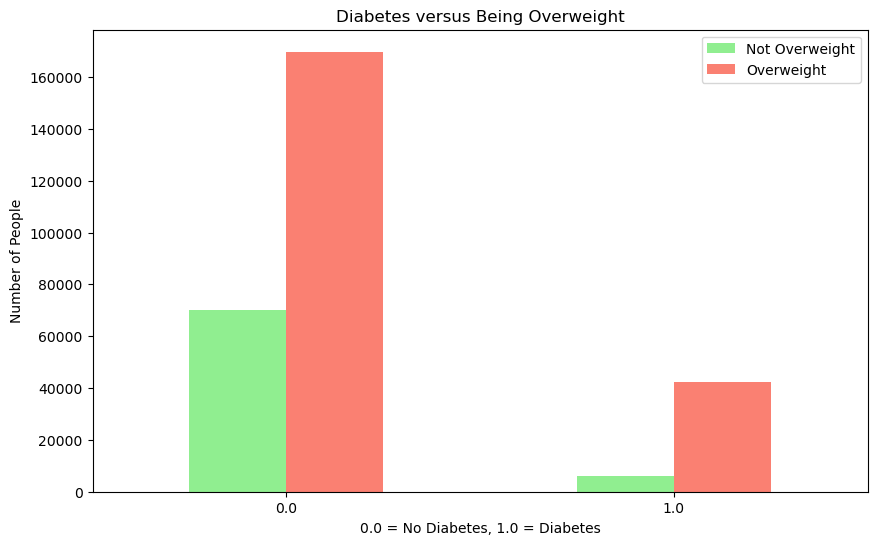

In [36]:
# Create a plot of crosstab
CDC_Diabetes_DataFrame_Selection['Overweight'] = np.where(CDC_Diabetes_DataFrame_Selection['BMI']<25,0,1) 
pd.crosstab(CDC_Diabetes_DataFrame_Selection.Diabetes, 
            CDC_Diabetes_DataFrame_Selection.Overweight).plot(kind = "bar", figsize=(10, 6), color=["lightgreen","salmon"])
plt.title("Diabetes versus Being Overweight")
plt.xlabel("0.0 = No Diabetes, 1.0 = Diabetes")
plt.ylabel("Number of People")
plt.legend(["Not Overweight", "Overweight"]);
plt.xticks(rotation=0);
CDC_Diabetes_DataFrame_Selection = CDC_Diabetes_DataFrame_Selection.drop(columns=['Overweight'])

**COMMENT**

> Note the imbalance of data with no diabetes versus diabetes.  

### 4b. View histograms of age of the complete dataset

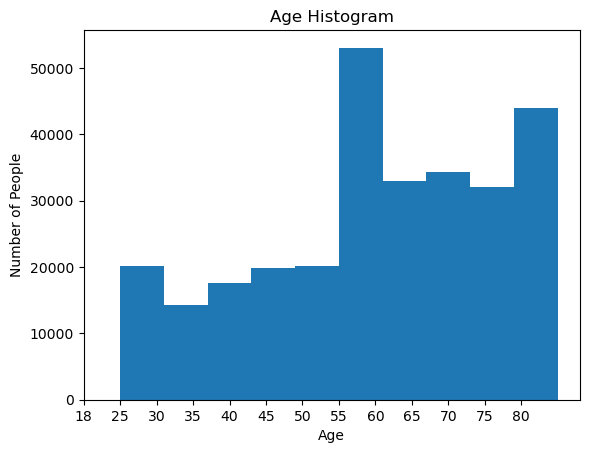

In [37]:
CDC_Diabetes_DataFrame_Selection.Age.plot.hist()
labels= ['18', '25', '30', '35', '40', '45', '50', '55', '60', '65', '70', '75', '80']
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.xticks(np.arange(13), labels);

**COMMENT**

> Note that survey responders tend to be 55 and older.

### 4c. View the correlation matrix 

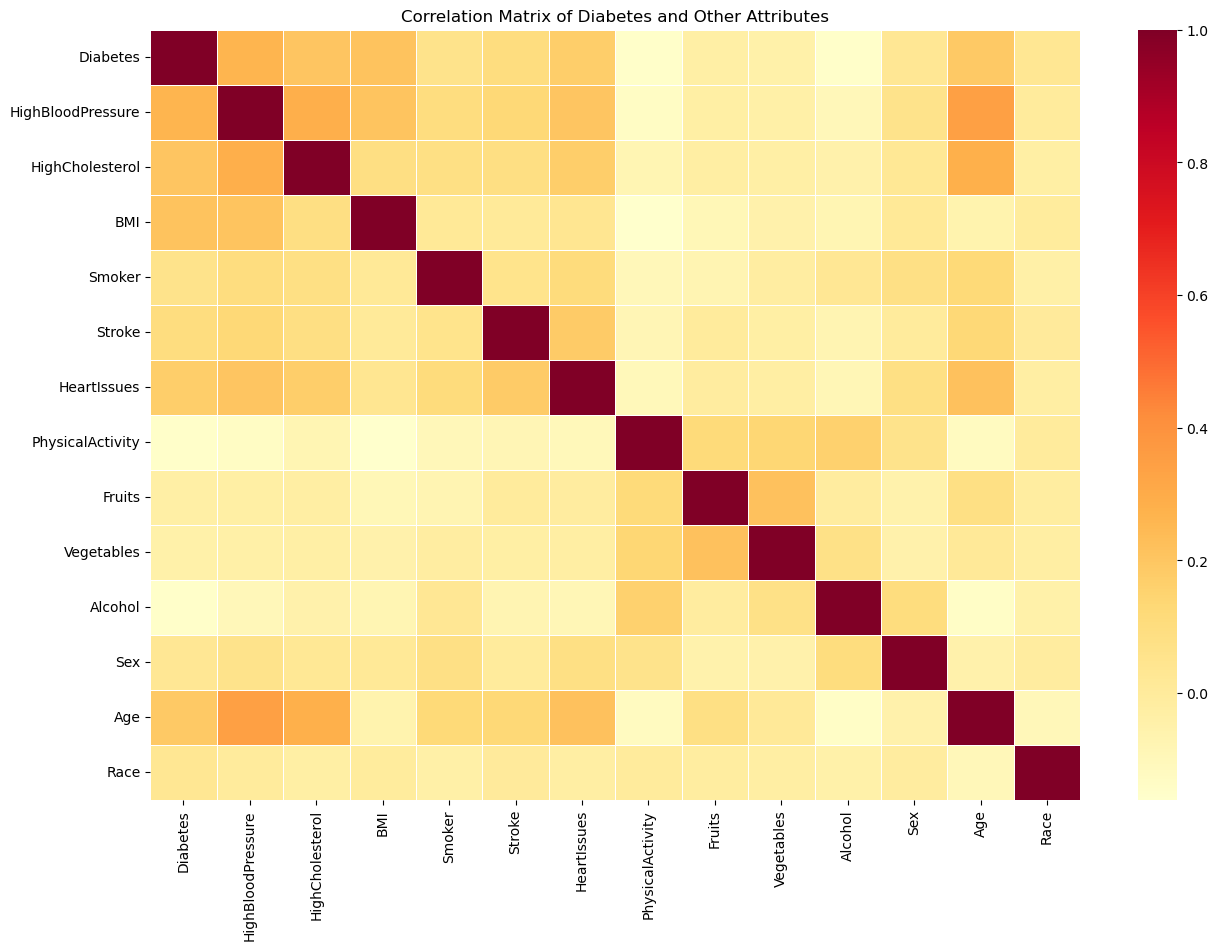

In [38]:
corr_matrix =  CDC_Diabetes_DataFrame_Selection.corr()
fig, ax = plt.subplots(figsize = (15, 10))
plt.title("Correlation Matrix of Diabetes and Other Attributes")
ax = sns.heatmap(corr_matrix, linewidths = 0.5, fmt=".2f", cmap="YlOrRd");

**COMMENT**

> The correlation matrix is a good way to identify impactful features.  The darker the colour, the more likely there is a correlation.  
> Since we are trying to reduce the number of questions in the tool, this is another way to reduce the number of features we need to study.

## STEP 5:  REDUCE AND BALANCE THE DATA SET 

The next step is to reduce and balance the dataset to ensure computing resources are not strained while maintaining precision and accuracy. 

* **5a.** Select a data count to reduce strain on resources
* **5b.** Determine if the data is balanced
* **5c.** Balance and reduce the data set

### 5a. Select a data count to reduce strain on resources

In [39]:
# Determine the size of data
CDC_Diabetes_DataFrame_Selection.shape

(288270, 14)

**COMMENT**

> The current data set contains 288,270 rows of data.  A smaller sample size is required to reduce the strain on computing resources and limit computing time.  

To make efficient use of resources, the model uses 6,000 diabetic and non-diabetic datapoints each for a total of 12,000. I have found this produces the optimum accuracy based on trial iterations.  More data points do not necessarily translate to a more accurate model and use excessive time to build the model and calculate the model's precision.

In [40]:
# Set the Maximum Length for the diabetic and non-diabetic dataset is selected for the purpose of this demonstration
MaxLength = 6000

### 5b. Determine if the data is balanced

A balanced data set facilitates the training of a machine-learning model so that the model is not biased towards one class.  

In [41]:
# Find the number of people with Diabetes and people without Diabetes in the data set.  
CDC_Diabetes_DataFrame_Selection.groupby(['Diabetes']).size()

Diabetes
0.0    239889
1.0     48381
dtype: int64

**COMMENT:**  
> Note that the remaining dataframe selection is imbalanced.  There are significantly more datapoints for people without Diabetes than with Diabetes.

### 5c. Balance the dataset and reduce the dataset

In [42]:
# Separate the sets into 0s for No Diabetes and 1s for Pre-diabetes and Diabetes
# Get the data for those who have Diabetes
Have_Diabetes = CDC_Diabetes_DataFrame_Selection['Diabetes'] == 1
Have_Diabetes_Data = CDC_Diabetes_DataFrame_Selection[Have_Diabetes]

# Get the data for those who do not have Diabetes
Does_Not_Have_Diabetes = CDC_Diabetes_DataFrame_Selection['Diabetes'] == 0
Does_Not_Have_Diabetes_Data = CDC_Diabetes_DataFrame_Selection[Does_Not_Have_Diabetes] 

In [43]:
# Select random data limited to the maximum number specified from each set  
Random_Does_Not_Have_Diabetes_Subset = Does_Not_Have_Diabetes_Data.take(np.random.permutation(len(Does_Not_Have_Diabetes_Data))[:MaxLength])
Random_Have_Diabetes_Subset = Have_Diabetes_Data.take(np.random.permutation(len(Have_Diabetes_Data))[:MaxLength])

# Join both sets with people with Diabetes and people without Diabetes. 
CDC_Diabetes_DataFrame_Balanced  = Random_Does_Not_Have_Diabetes_Subset._append(Random_Have_Diabetes_Subset, ignore_index = True)

In [44]:
# Check that the above resulted in a balanced set of data. The number of diabetes data points should equal the number of non-diabetes data points.  
CDC_Diabetes_DataFrame_Balanced.groupby(['Diabetes']).size()

Diabetes
0.0    6000
1.0    6000
dtype: int64

In [45]:
CDC_Diabetes_DataFrame_Balanced.describe()

,Diabetes,HighBloodPressure,HighCholesterol,BMI,Smoker,Stroke,HeartIssues,PhysicalActivity,Fruits,Vegetables,Alcohol,Sex,Age,Race
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,0.500000,0.539167,0.488500,30.082000,0.434167,0.056333,0.125583,0.720833,0.615167,0.807333,0.466500,0.473917,8.574917,1.182500
std,0.500021,0.498484,0.499889,7.135219,0.495668,0.230574,0.331393,0.448608,0.486576,0.394410,0.498897,0.499340,3.091685,0.723812
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,7.000000,1.000000
50%,0.500000,1.000000,0.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,9.000000,1.000000
75%,1.000000,1.000000,1.000000,34.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,1.000000
max,1.000000,1.000000,1.000000,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,5.000000


## STEP 6:  CREATE TRAINING AND TESTING DATA SETS

In [46]:
# Split data into X which reflects the matrix of independent variables and y is the set of target values to be predicted
# X includes the data from columns other than diabetes
X = CDC_Diabetes_DataFrame_Balanced.drop("Diabetes", axis = 1)

# y includes the data from the diabetes column 
y = CDC_Diabetes_DataFrame_Balanced["Diabetes"]

In [47]:
#Visualize X (Should reflect all columns except Diabetes column) 
X

,HighBloodPressure,HighCholesterol,BMI,Smoker,Stroke,HeartIssues,PhysicalActivity,Fruits,Vegetables,Alcohol,Sex,Age,Race
0,0,1.0,21.0,0.0,0.0,0.0,1,0,1,0,0,13,1.0
1,1,0.0,35.0,0.0,0.0,0.0,0,1,1,0,0,12,1.0
2,1,0.0,28.0,1.0,0.0,0.0,1,0,1,1,0,12,1.0
3,1,1.0,39.0,1.0,0.0,0.0,1,1,1,0,0,8,1.0
4,0,0.0,29.0,1.0,0.0,0.0,1,1,0,1,1,12,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,1,1.0,37.0,0.0,0.0,0.0,0,1,1,0,0,11,1.0
11996,1,0.0,35.0,1.0,0.0,0.0,0,0,0,1,1,10,1.0
11997,0,0.0,30.0,1.0,0.0,0.0,0,0,1,1,1,8,1.0
11998,0,0.0,20.0,0.0,0.0,0.0,1,1,1,0,0,11,4.0


In [48]:
# Visualize y (Should just be the Diabetes column indicating whether someone has Diabetes(1) or not(0))
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
11995    1.0
11996    1.0
11997    1.0
11998    1.0
11999    1.0
Name: Diabetes, Length: 12000, dtype: float64

In [49]:
# Split data into training and testing sets; I will use a 80/20 split where 80% is used for training and 20% is used to testing
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state=seed)

In [50]:
# Determine size of X, X_train and X_test.  X_train + X_test should equal the original data set X. 
len(X), len(X_train), len(X_test)

(12000, 9600, 2400)

In [51]:
# Determine size of y, y_train and y_test.  y_train + y_test should equal the original data set y. 
len(y), len(y_train), len(y_test)

(12000, 9600, 2400)

## STEP 7:  SELECT, TRAIN AND EVALUATE MODELS

The next step is to select, train and evaluate various models for a best-fit model.  

* **7a.** Create a list of models to test
* **7b.** Train and Test the selected models
* **7c.** Evaluate the models

### 7a.  Create a list of models to test

Machine learning models for Type 2 Diabetes were selected based on models suggested by Scikit-Learn for use with supervised learning on classification problems:  
> https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

The list of models was then cross-referenced with the 18 models studied in the article "Machine Learning and Deeper Learning Predictive Models for Type 2 Diabetes: A Systematic Review" located at the following site: 
> https://dmsjournal.biomedcentral.com/articles/10.1186/s13098-021-00767-9

The following classification algorithms were selected for evaluation based on size of data set and resources to run the data:
1. DT = Decision Tree Classifier 
2. RF = Random Forest Classifier
3. SVM = Support Vector Machine Classifier
4. KNN = K Nearest Neighbor Classifier
5. BNB = Bernoulli Naive Bayes Classifier

In [52]:
# Create a list of models to test
Models = []
Models.append(('DT', DecisionTreeClassifier()))
Models.append(('RF', RandomForestClassifier()))
Models.append(('SVM', SVC(kernel='rbf')))
Models.append(('KNN', KNeighborsClassifier()))
Models.append(('BNB', BernoulliNB()))


### 7b. Train and Test the selected models

The classification model is evaluated as follows: 
* Accuracy score reflects how often the classification machine learning model is correct in predicting diabetes or no diabetes overall.
  > Accuracy = (True Positives + True Negatives)/Total
* Precision score refers to how often the classification machine learning model is correct when predicting the target class of diabetes.
  > Precision = True Positives/(True Positives + False Positives)

Note:  This next cell will take a moment to run but, please be patient.

In [53]:
# Train and Test the selected models
Names = []
Precision_Scores = []
Accuracy_Scores = []
for name, model in Models:
    model.fit(X_train, y_train)
    Accuracy_Scores.append(model.score(X_test, y_test)*100)
    Precision_Scores.append((precision_score(y_test, model.predict(X_test)))*100)
    Names.append(name)
ModelsWithScores = pd.DataFrame({'Model': Names, 'Accuracy_Score': Accuracy_Scores, 'Precision_Score': Precision_Scores})
print(ModelsWithScores)

  Model  Accuracy_Score  Precision_Score
0    DT       62.125000        62.707424
1    RF       67.458333        67.158067
2   SVM       71.791667        70.224285
3   KNN       68.208333        69.285084
4   BNB       69.375000        69.554247


**COMMENT**  

> The above accuracy scores and precision scores are on a scale of 1 to 100, with the higher number being better.  

FOR REFERENCE: 
1. DT = Decision Tree Classifier 
2. RF = Random Forest Classifier
3. SVM = Support Vector Machine Classifier
4. KNN = K Nearest Neighbor Classifier
5. BNB = Bernoulli Naive Bayes Classifier

### 7c. Evaluate the models

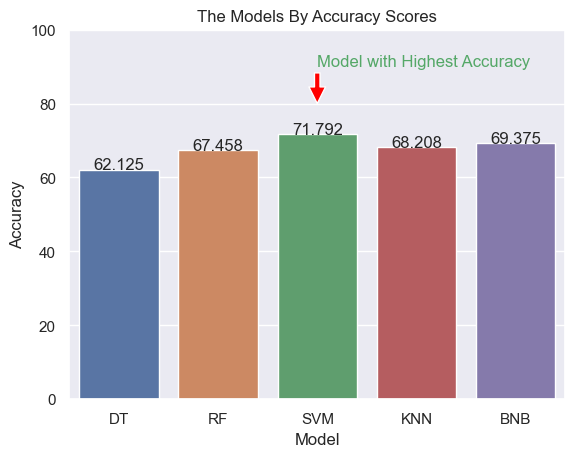

In [54]:
# Plot the accuracy for each model
sns.set(font_scale=1.0) 
axis = sns.barplot(x='Model', y='Accuracy_Score', data=ModelsWithScores)
axis.set(xlabel='Model', ylabel='Accuracy', title='The Models By Accuracy Scores')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.3f}'.format(height), ha="center")
plt.ylim(0,100)
plt.annotate('Model with Highest Accuracy', xy = (2, 80), fontsize = 12, xytext = (2, 90), arrowprops = dict(facecolor = 'red'), color = 'g')
plt.show()

**COMMENTS** 

The SVM Model produces the highest accuracy score. 

FOR REFERENCE: 
1. DT = Decision Tree Classifier 
2. RF = Random Forest Classifier
3. SVM = Support Vector Machine Classifier
4. KNN = K Nearest Neighbor Classifier
5. BNB = Bernoulli Naive Bayes Classifier

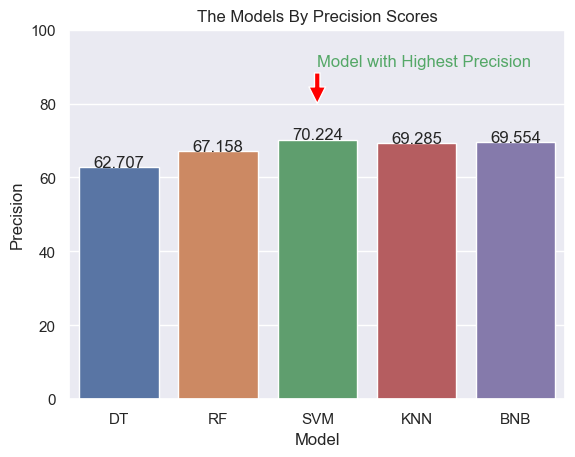

In [55]:
# Plot the precision for each model
sns.set(font_scale=1.0) 
axis = sns.barplot(x='Model', y='Precision_Score', data=ModelsWithScores)
axis.set(xlabel='Model', ylabel='Precision', title='The Models By Precision Scores')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.3f}'.format(height), ha="center")
plt.ylim(0,100)
plt.annotate('Model with Highest Precision', xy = (2, 80), fontsize = 12, xytext = (2, 90), arrowprops = dict(facecolor = 'red'), color = 'g')
plt.show()

**COMMENTS** 

> Therefore, I selected Support Vector Machine Classifier (SVM) as the preferred model for the survey tool.

FOR REFERENCE: 
1. DT = Decision Tree Classifier 
2. RF = Random Forest Classifier
3. SVM = Support Vector Machine Classifier
4. KNN = K Nearest Neighbor Classifier
5. BNB = Bernoulli Naive Bayes Classifier

## STEP 8: SELECT THE MOST PRECISE MODEL AND FINE TUNE IT

The next step is to select the model that returns the most precise score.  

* **8a.** Select the most precise model
* **8b.** Identify features to remove by determining feature importance
* **8c.** Removed features in the interest of efficiency and reviewed the final data
* **8d.** Finalize the model and data for use in the Diabetes Predictor Tool
* **8e.** Review the classification report and confusion matrix
* **8f.** Save the model

### 8a.  Select the most accurate and precise model

The Support Vector Machine Classifier (SVM) consistently returns the highest accuracy and precision score, so I will use this model as the basis of the diabetes prediction tool and finetune the features for better metrics.  

In [56]:
# Select the model
Selected_Model_Before_Finetuning = SVC(kernel='rbf')

In [57]:
# Train the model
Selected_Model_Before_Finetuning.fit(X_train, y_train);

In [58]:
# Test the model for accuracy and output
print("Current accuracy score:", round(Selected_Model_Before_Finetuning.score(X_test, y_test)*100, 4))

Current accuracy score: 71.7917


In [59]:
# Test the model for precision and output
print("Current precision score:", round(precision_score(y_test, Selected_Model_Before_Finetuning.predict(X_test))*100, 4))

Current precision score: 70.2243


### 8b. Identify features to remove by determining feature importance

To reduce the time for the prediction model to run and to ensure we make efficient use of questions we need to ask, we must identify the features that contribute the most to the accuracy of the Support Vector Machine Classifier model.  

In [60]:
# Get all feature names
Feature_Names = X.columns.values.tolist()
Feature_Names

['HighBloodPressure',
 'HighCholesterol',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartIssues',
 'PhysicalActivity',
 'Fruits',
 'Vegetables',
 'Alcohol',
 'Sex',
 'Age',
 'Race']

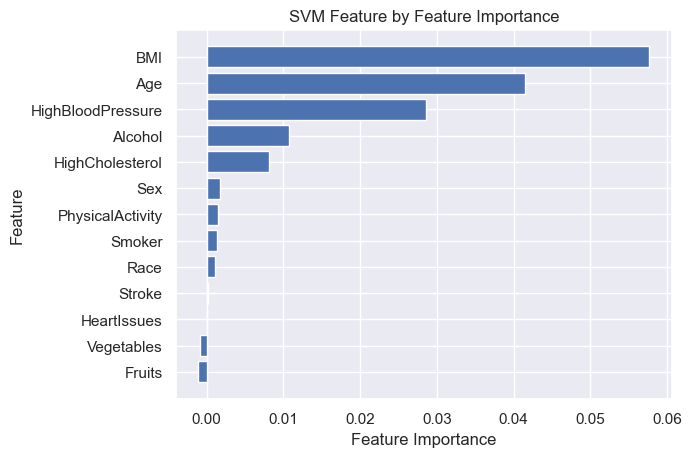

In [61]:
# Display a bar graph of features by importance
Features = np.array(Feature_Names)
Feature_Importance = permutation_importance(Selected_Model_Before_Finetuning, X_test, y_test)
Sorted_Features_Index = Feature_Importance.importances_mean.argsort()
plt.barh(Features[Sorted_Features_Index], Feature_Importance.importances_mean[Sorted_Features_Index])
plt.xlabel("Feature Importance")    
plt.ylabel("Feature")
plt.title("SVM Feature by Feature Importance")
plt.show()

### 8c. Removed least impactful features in the interest of efficiency and reviewed the Final Data

In [62]:
# Finalize the Data by dropping columns with lower impacts to reduce questions to ask on survey 
Final_Data = CDC_Diabetes_DataFrame_Balanced.drop(columns=['Fruits','Vegetables'])

In [63]:
Final_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Diabetes           12000 non-null  float64
 1   HighBloodPressure  12000 non-null  int64  
 2   HighCholesterol    12000 non-null  float64
 3   BMI                12000 non-null  float64
 4   Smoker             12000 non-null  float64
 5   Stroke             12000 non-null  float64
 6   HeartIssues        12000 non-null  float64
 7   PhysicalActivity   12000 non-null  int64  
 8   Alcohol            12000 non-null  int64  
 9   Sex                12000 non-null  int64  
 10  Age                12000 non-null  int64  
 11  Race               12000 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 1.1 MB


In [64]:
Final_Data.describe()

,Diabetes,HighBloodPressure,HighCholesterol,BMI,Smoker,Stroke,HeartIssues,PhysicalActivity,Alcohol,Sex,Age,Race
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,0.500000,0.539167,0.488500,30.082000,0.434167,0.056333,0.125583,0.720833,0.466500,0.473917,8.574917,1.182500
std,0.500021,0.498484,0.499889,7.135219,0.495668,0.230574,0.331393,0.448608,0.498897,0.499340,3.091685,0.723812
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000
50%,0.500000,1.000000,0.000000,29.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,9.000000,1.000000
75%,1.000000,1.000000,1.000000,34.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,11.000000,1.000000
max,1.000000,1.000000,1.000000,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,5.000000


### 8d. Finalize the model and data for use in the Diabetes Predictor Tool

In [65]:
# Finalize the model
Final_Model = SVC(kernel='rbf')

In [66]:
# Split data into X which reflects the matrix of independent variables and y is the set of target values to be predicted
# X includes the data from columns other than diabetes
X = Final_Data.drop("Diabetes", axis = 1)

# y includes the data from the diabetes column 
y = Final_Data["Diabetes"]

In [67]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state=seed)

In [68]:
# Train the model 
Final_Model.fit(X_train, y_train);

In [69]:
# Test the model for accuracy 
print("Current accuracy score:", round(Final_Model.score(X_test, y_test)*100,4))

Current accuracy score: 71.9583


In [70]:
# Test the model for precision
print("Current precision score:", round(precision_score(y_test, Final_Model.predict(X_test))*100,4))

Current precision score: 70.379


### 8e. Review the classification report and confusion matrix 

In [71]:
# Display the classification report
actual = y_test
predicted = Final_Model.predict(X_test)
print(classification_report(actual, predicted, target_names=["No Diabetes", "Diabetes"]))

              precision    recall  f1-score   support

 No Diabetes       0.74      0.68      0.71      1200
    Diabetes       0.70      0.76      0.73      1200

    accuracy                           0.72      2400
   macro avg       0.72      0.72      0.72      2400
weighted avg       0.72      0.72      0.72      2400



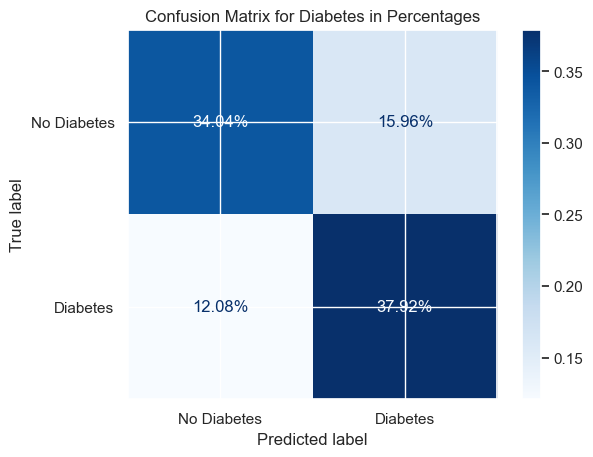

In [72]:
# Display Confusion Matrix in percentages
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix/np.sum(confusion_matrix), display_labels = ["No Diabetes", "Diabetes"])
cm_display.plot(values_format = '.2%', cmap='Blues')
plt.title('Confusion Matrix for Diabetes in Percentages')
plt.show()

### 8f. Save the model and the data

In [73]:
# Save the model for use in the application
pickle.dump(Final_Model, open('Trained_Model.sav', 'wb'))

In [74]:
# Save the data for use ine application
Final_Data.to_csv('Final_Data.csv')

###  END OF PART A

Return to 0-Diabetes Predictor Notebook.ipynb
> https://github.com/mdoane7/capstone/blob/main/0-Diabetes%20Predictor%20Notebook.ipynb